<a href="https://colab.research.google.com/github/rufusclieve/Car-Price-Prediction-Model/blob/main/Project_2_Car_Price_Predictioni.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# WorkFlow


1.   Car Price dataset
2.   Data preprocessing
3.   Data Analysis
4.   Train and Test Spitting
5.   Linear and Lasso Regression models
6.   Evaluation (By Testing Dataset)








In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [ ]:
# importing Boston Car Price Dataset
car_dataset = pd.read_csv('/content/drive/MyDrive/car data.csv')

In [ ]:
car_dataset.shape

(301, 9)

In [ ]:
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [ ]:
car_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [ ]:
# checking for the nul values
car_dataset.isnull().sum()

,0
Car_Name,0
Year,0
Selling_Price,0
Present_Price,0
Kms_Driven,0
Fuel_Type,0
Seller_Type,0
Transmission,0
Owner,0


In [ ]:
# checking the distribution of categoritical data
print(car_dataset.Fuel_Type.value_counts())
print(car_dataset.Seller_Type.value_counts())
print(car_dataset.Transmission.value_counts())

Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64
Seller_Type
Dealer        195
Individual    106
Name: count, dtype: int64
Transmission
Manual       261
Automatic     40
Name: count, dtype: int64


In [ ]:
# Encoding the Categorical data for Fuel_Type
car_dataset.replace({'Fuel_Type':{'Petrol':0, 'Diesel':1, 'CNG':2}},inplace=True)

In [ ]:
# Encoding the Categorical data for Seller_Type
car_dataset.replace({'Seller_Type': {'Dealer':0, 'Individual':1}}, inplace = True)

In [ ]:
# Encoding the Categorical data for Transmission
car_dataset.replace({'Transmission':{'Manual':0, 'Automatic':1}}, inplace=True)

In [ ]:
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


In [ ]:
#splitting training and testing data

X = car_dataset.drop(['Car_Name','Selling_Price'], axis = 1)
Y = car_dataset['Selling_Price']

In [ ]:
print(X)

     Year  Present_Price  Kms_Driven  Fuel_Type  Seller_Type  Transmission  \
0    2014           5.59       27000          0            0             0   
1    2013           9.54       43000          1            0             0   
2    2017           9.85        6900          0            0             0   
3    2011           4.15        5200          0            0             0   
4    2014           6.87       42450          1            0             0   
..    ...            ...         ...        ...          ...           ...   
296  2016          11.60       33988          1            0             0   
297  2015           5.90       60000          0            0             0   
298  2009          11.00       87934          0            0             0   
299  2017          12.50        9000          1            0             0   
300  2016           5.90        5464          0            0             0   

     Owner  
0        0  
1        0  
2        0  
3        0 

In [ ]:
print(Y)

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64


In [ ]:
#splitting the dataset to training and testing
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.1, random_state = 3)

In [ ]:
# loading the model
lr = LinearRegression()

In [ ]:
lr.fit(x_train, y_train)

LinearRegression()

In [ ]:
# model Evaluation
train_data_prediction = lr.predict(x_train)

In [ ]:
# R square error
error_score = metrics.r2_score(y_train, train_data_prediction)
print("R square error : ", error_score)


R square error :  0.8849815853900536


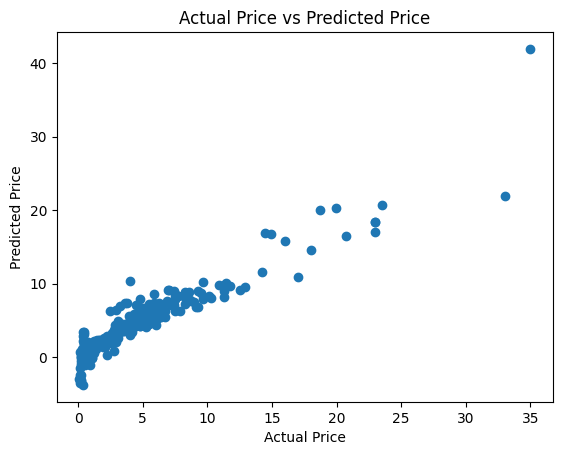

In [ ]:
#lets plot a graph and check
plt.scatter(y_train, train_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Price vs Predicted Price")
plt.show()

In [ ]:
# check for testing data
test_data_prediction = lr.predict(x_test)

In [ ]:
# R square error
error_score = metrics.r2_score(y_test, test_data_prediction)
print("R square error : ", error_score)

R square error :  0.7979072218427206


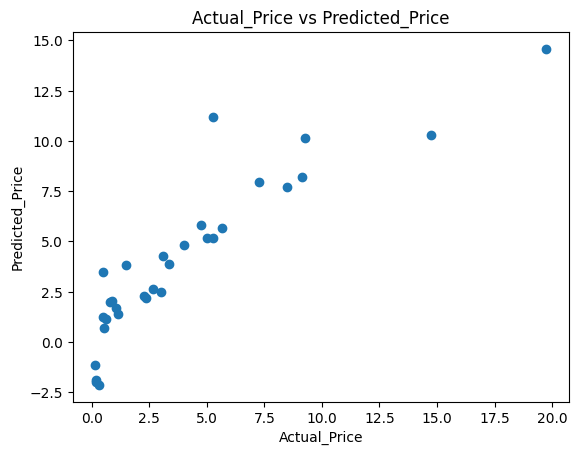

In [ ]:
plt.scatter(y_test, test_data_prediction)
plt.xlabel("Actual_Price")
plt.ylabel("Predicted_Price")
plt.title("Actual_Price vs Predicted_Price")
plt.show()

In [ ]:
from sklearn.linear_model import Lasso

In [ ]:
# loading the model
lassso_mod = Lasso()

In [ ]:
lassso_mod.fit(x_train, y_train)

Lasso()

In [ ]:
#evaluation
train_data_prediction = lassso_mod.predict(x_train)

In [ ]:
# R square error
error_score = metrics.r2_score(y_train, train_data_prediction)
print("R square error : ", error_score)


R square error :  0.8469788692279795


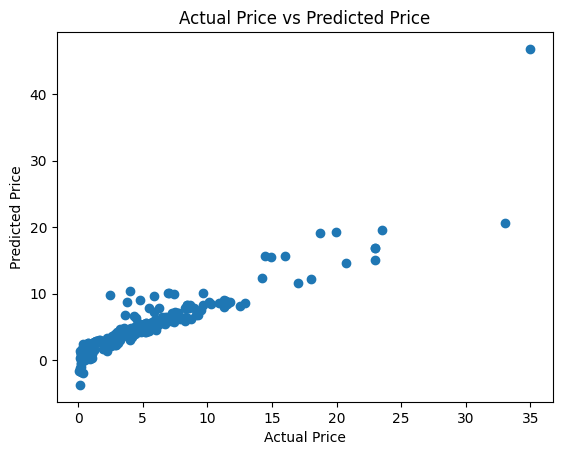

In [ ]:
#lets plot a graph and check
plt.scatter(y_train, train_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Price vs Predicted Price")
plt.show()

In [ ]:
lassso_mod.fit(x_test, y_test)

Lasso()

In [ ]:
#evaluation
test_data_prediction = lassso_mod.predict(x_test)

In [ ]:
# R square error
error_score = metrics.r2_score(y_test, test_data_prediction)
print("R square error : ", error_score)


R square error :  0.8018872456220607


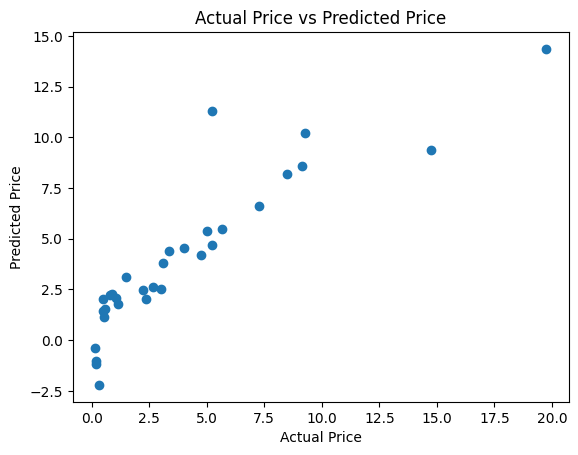

In [ ]:
#lets plot a graph and check
plt.scatter(y_test, test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Price vs Predicted Price")
plt.show()